In [115]:
import pandas as pd

file_path = 'C:/Users/acorn/Documents/python/일별소매가/감자_상품_100g_일별소매가.csv'
data = pd.read_csv(file_path, encoding='cp949')

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      3950 non-null   object 
 1   평균      3950 non-null   float64
 2   전통시장    3950 non-null   float64
 3   유통업체    3950 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.6+ KB


(           구분     평균   전통시장   유통업체
 0  2014-01-02  202.0  200.0  204.0
 1  2014-01-03  208.0  200.0  215.0
 2  2014-01-04  208.0  200.0  215.0
 3  2014-01-05  208.0  200.0  215.0
 4  2014-01-06  281.0  217.0  323.0,
 None)

In [117]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

data['구분'] = pd.to_datetime(data['구분'])

data['Year'] = data['구분'].dt.year
yearly_data = data.groupby('Year')['평균'].mean().reset_index()

yearly_data.head()

,Year,평균
0,2014,239.469780
1,2015,303.515068
2,2016,295.248634
3,2017,387.049315
4,2018,460.169863


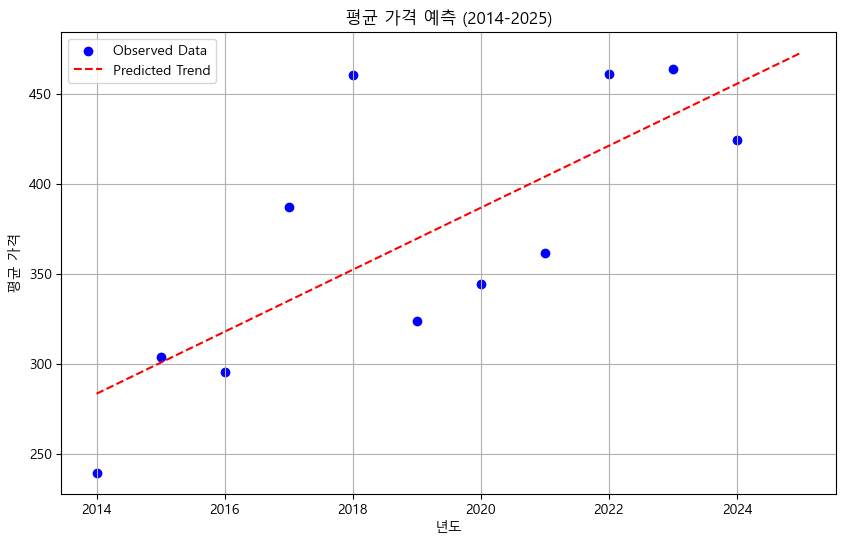

In [119]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = yearly_data['Year'].values.reshape(-1, 1)
y = yearly_data['평균'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(2014, 2026).reshape(-1, 1)
predicted_prices = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.scatter(yearly_data['Year'], yearly_data['평균'], color='blue', label='Observed Data')
plt.plot(future_years, predicted_prices, color='red', linestyle='--', label='Predicted Trend')
plt.title('평균 가격 예측 (2014-2025)')
plt.xlabel('년도')
plt.ylabel('평균 가격')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
data.set_index('구분', inplace=True)

daily_prices = data['평균']

daily_prices.isnull().sum(), daily_prices.head()

(0,
 구분
 2014-01-02    202.0
 2014-01-03    208.0
 2014-01-04    208.0
 2014-01-05    208.0
 2014-01-06    281.0
 Name: 평균, dtype: float64)

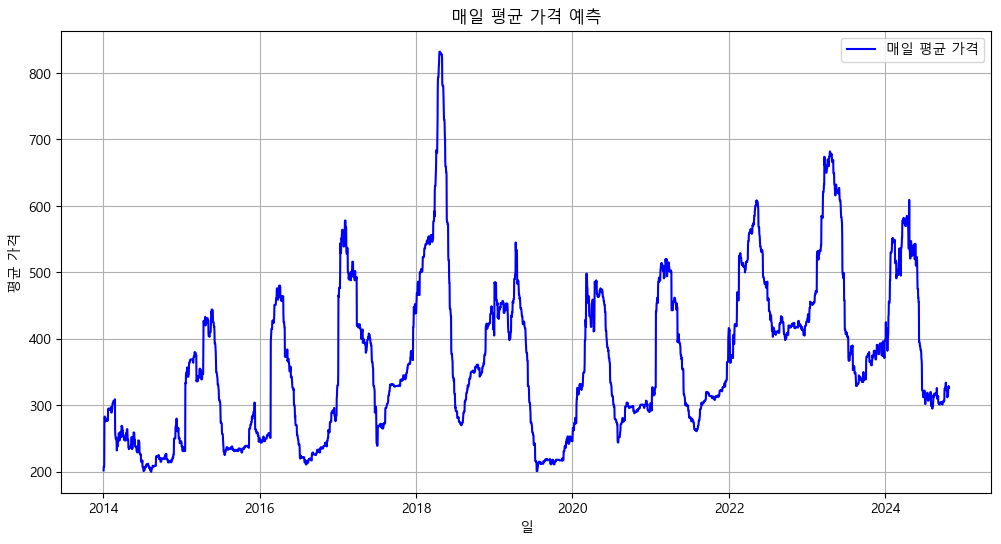

In [123]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터를 시계열로 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['평균'], label='매일 평균 가격', color='blue')
plt.title('매일 평균 가격 예측')
plt.xlabel('일')
plt.ylabel('평균 가격')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
import pandas as pd

file_path = 'C:/Users/acorn/Documents/python/일별소매가/감자_상품_100g_일별소매가.csv'
data = pd.read_csv(file_path, encoding='cp949')

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      3950 non-null   object 
 1   평균      3950 non-null   float64
 2   전통시장    3950 non-null   float64
 3   유통업체    3950 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.6+ KB


(           구분     평균   전통시장   유통업체
 0  2014-01-02  202.0  200.0  204.0
 1  2014-01-03  208.0  200.0  215.0
 2  2014-01-04  208.0  200.0  215.0
 3  2014-01-05  208.0  200.0  215.0
 4  2014-01-06  281.0  217.0  323.0,
 None)

C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


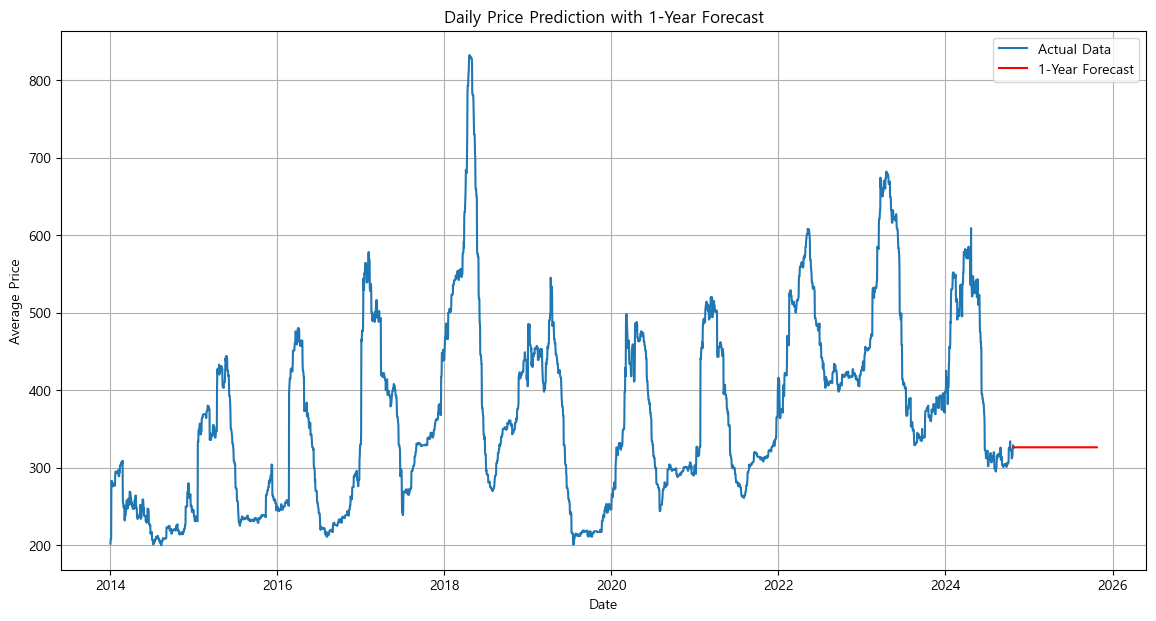

In [127]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 날짜를 인덱스로 설정
data.set_index('구분', inplace=True)
data.index = pd.to_datetime(data.index)

# '평균' 데이터만 사용
daily_prices = data['평균']

# 모델 학습 (ARIMA: p=5, d=1, q=0 - 필요 시 수정 가능)
model = ARIMA(daily_prices, order=(5, 1, 0))
fitted_model = model.fit()

# 1년(365일) 예측
forecast = fitted_model.get_forecast(steps=365)
forecast_index = pd.date_range(start=daily_prices.index[-1], periods=365, freq='D')
forecast_values = forecast.predicted_mean

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(daily_prices, label='Actual Data')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast', color='red')
plt.title('Daily Price Prediction with 1-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
monthly_prices = daily_prices.resample('MS').mean()  # 'MS'는 월 시작일 기준

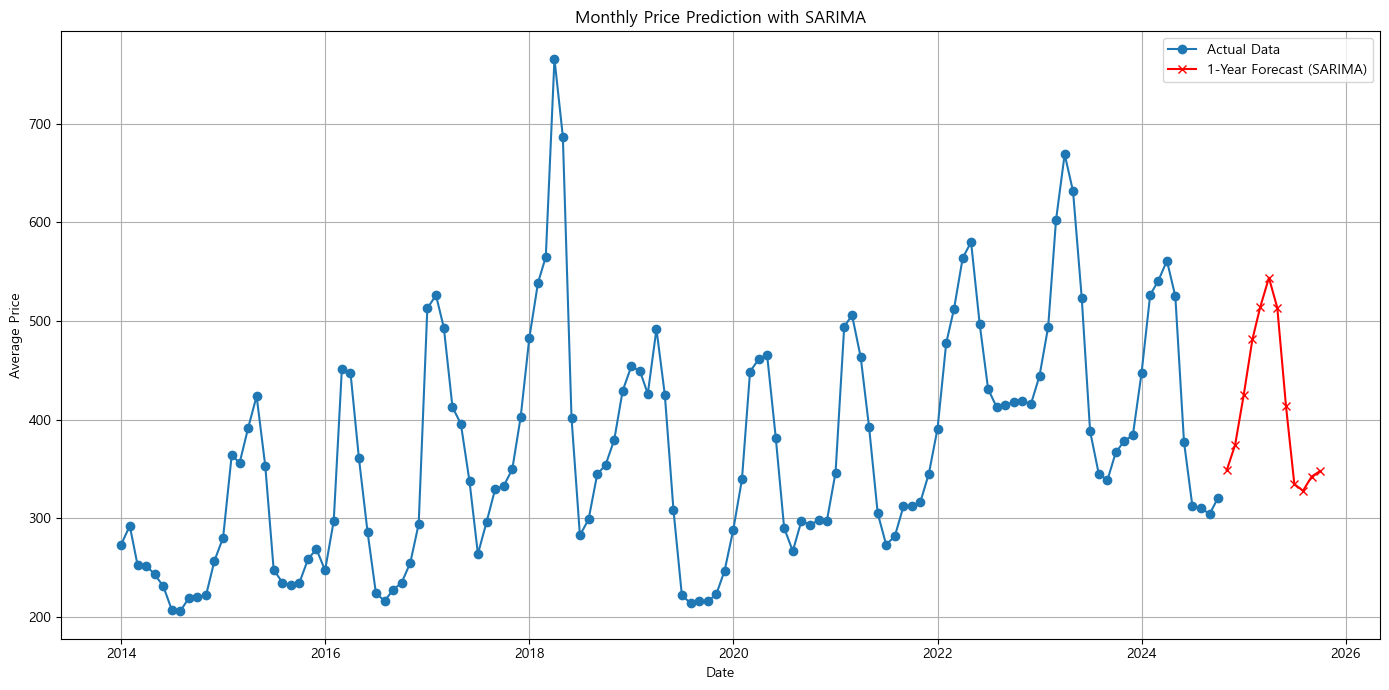

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# SARIMA 모델 학습 (계절성 주기: 12개월 기준)
model = SARIMAX(monthly_prices,  # 데이터가 월별 데이터로 집계된 상태여야 함
                order=(5, 1, 0), 
                seasonal_order=(1, 1, 1, 12))  # 계절성 주기: 12개월
fitted_model = model.fit()

# 1년(12개월) 예측
forecast = fitted_model.get_forecast(steps=12)
forecast_values = forecast.predicted_mean

# 예측 인덱스 생성
forecast_index = pd.date_range(start=monthly_prices.index[-1] + pd.DateOffset(months=1), 
                               periods=12, freq='MS')  # 월 시작일 기준

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_prices, label='Actual Data', marker='o')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast (SARIMA)', color='red', marker='x')
plt.title('Monthly Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
#plt.show()
plt.tight_layout()
plt.savefig('2024감자 2025예측.png')


In [130]:
import pandas as pd

file_path = 'C:/Users/acorn/Documents/python/일별소매가/감자_2023년_12월까지.csv'
data = pd.read_csv(file_path, encoding='utf-8')

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      3651 non-null   object
 1   평균      3651 non-null   int64 
 2   전통시장    3651 non-null   int64 
 3   유통업체    3651 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 114.2+ KB


(           구분   평균  전통시장  유통업체
 0  2014-01-02  202   200   204
 1  2014-01-03  208   200   215
 2  2014-01-04  208   200   215
 3  2014-01-05  208   200   215
 4  2014-01-06  281   217   323,
 None)

In [131]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

data['구분'] = pd.to_datetime(data['구분'])

data['Year'] = data['구분'].dt.year
yearly_data = data.groupby('Year')['평균'].mean().reset_index()

yearly_data.head()

,Year,평균
0,2014,239.469780
1,2015,303.515068
2,2016,295.248634
3,2017,387.049315
4,2018,460.169863


In [134]:
data.set_index('구분', inplace=True)

daily_prices = data['평균']

daily_prices.isnull().sum(), daily_prices.head()

(0,
 구분
 2014-01-02    202
 2014-01-03    208
 2014-01-04    208
 2014-01-05    208
 2014-01-06    281
 Name: 평균, dtype: int64)

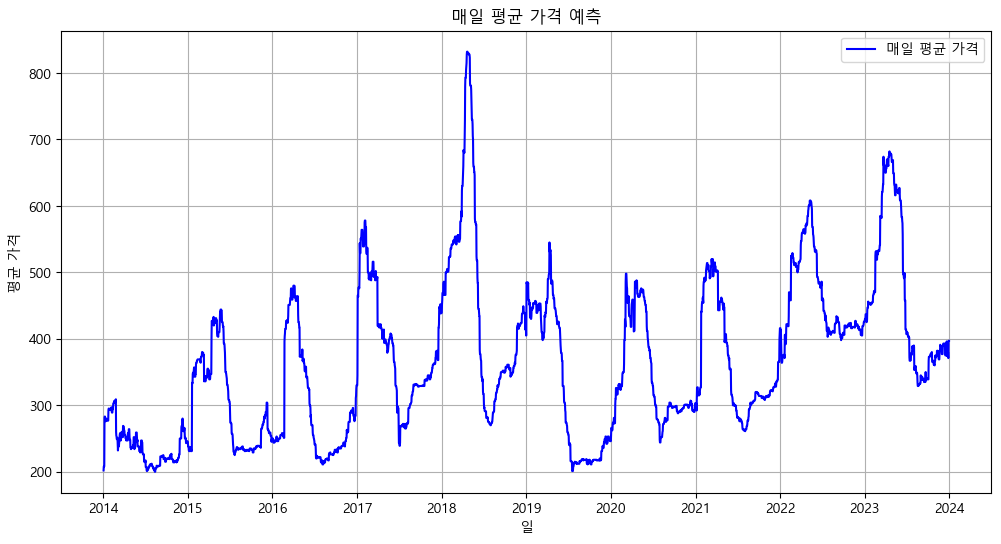

In [135]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터를 시계열로 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['평균'], label='매일 평균 가격', color='blue')
plt.title('매일 평균 가격 예측')
plt.xlabel('일')
plt.ylabel('평균 가격')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


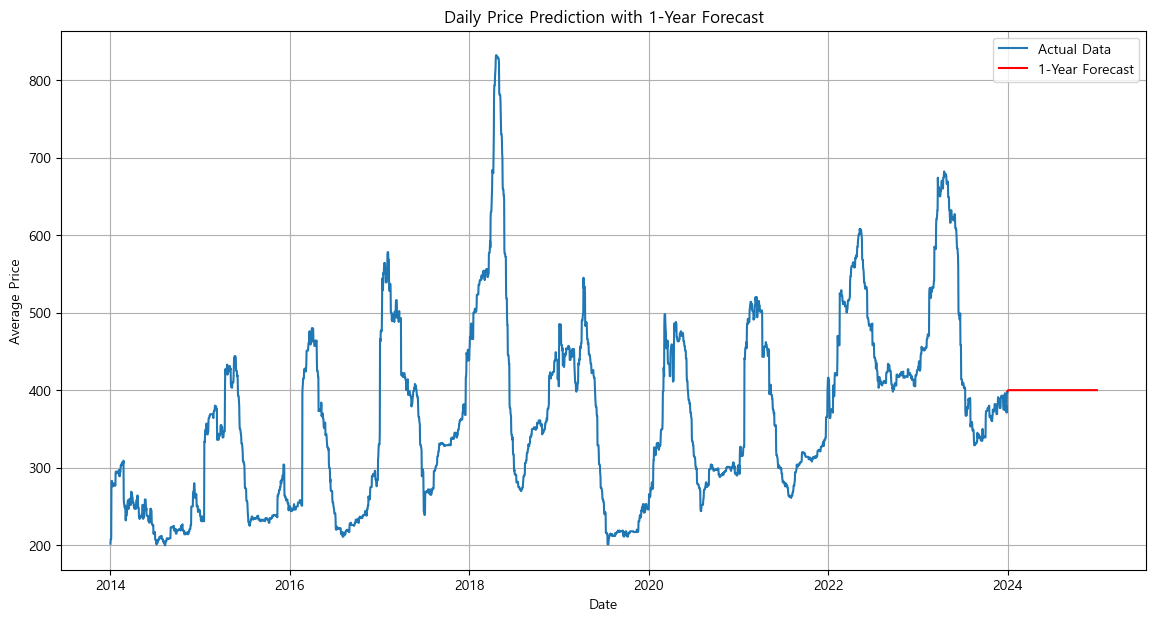

In [136]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 날짜를 인덱스로 설정
#data.set_index('구분', inplace=True)
data.index = pd.to_datetime(data.index)

# '평균' 데이터만 사용
daily_prices = data['평균']

# 모델 학습 (ARIMA: p=5, d=1, q=0 - 필요 시 수정 가능)
model = ARIMA(daily_prices, order=(5, 1, 0))
fitted_model = model.fit()

# 1년(365일) 예측
forecast = fitted_model.get_forecast(steps=365)
forecast_index = pd.date_range(start=daily_prices.index[-1], periods=365, freq='D')
forecast_values = forecast.predicted_mean

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(daily_prices, label='Actual Data')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast', color='red')
plt.title('Daily Price Prediction with 1-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [137]:
monthly_prices = daily_prices.resample('MS').mean()  # 'MS'는 월 시작일 기준

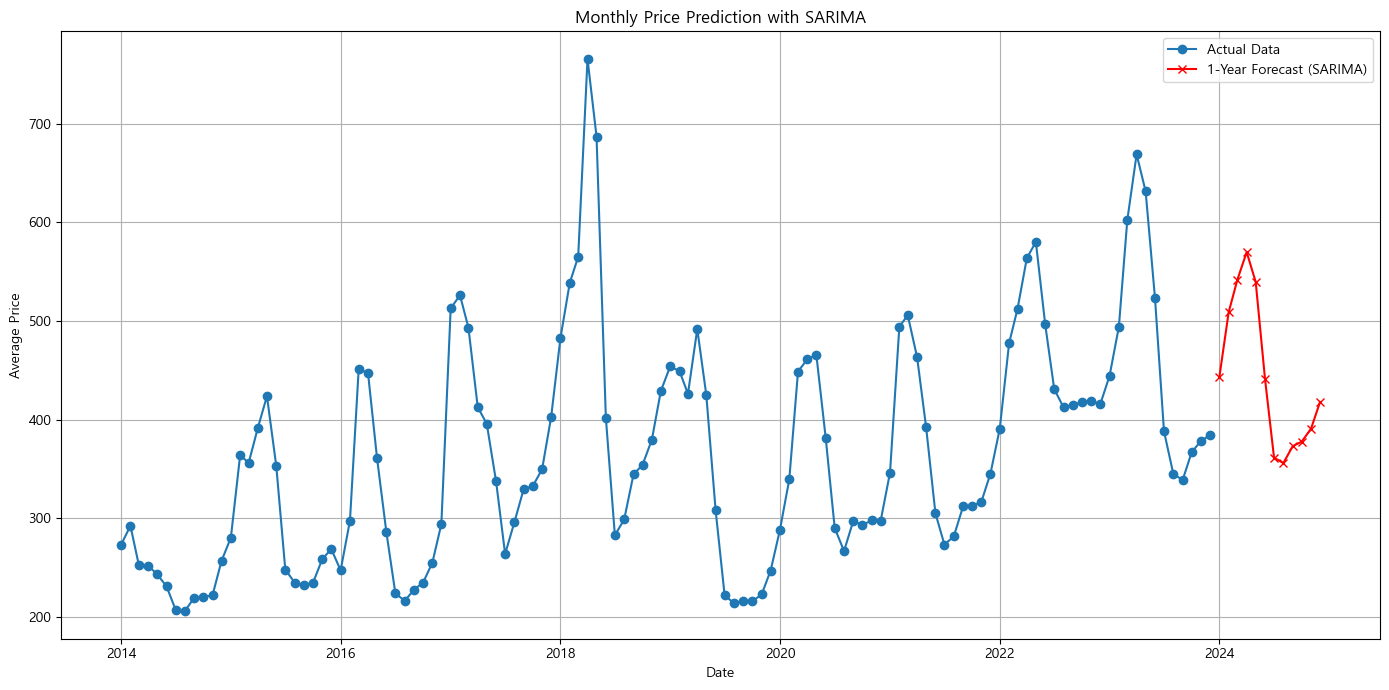

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# SARIMA 모델 학습 (계절성 주기: 12개월 기준)
model = SARIMAX(monthly_prices,  # 데이터가 월별 데이터로 집계된 상태여야 함
                order=(5, 1, 0), 
                seasonal_order=(1, 1, 1, 12))  # 계절성 주기: 12개월
fitted_model = model.fit()

# 1년(12개월) 예측
forecast = fitted_model.get_forecast(steps=12)
forecast_values = forecast.predicted_mean

# 예측 인덱스 생성
forecast_index = pd.date_range(start=monthly_prices.index[-1] + pd.DateOffset(months=1), 
                               periods=12, freq='MS')  # 월 시작일 기준

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_prices, label='Actual Data', marker='o')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast (SARIMA)', color='red', marker='x')
plt.title('Monthly Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
#plt.show()
plt.tight_layout()
plt.savefig('2023감자 2024예측.png')


In [152]:
# 일별 데이터를 반월(15일) 단위 평균으로 변환
half_month_prices = daily_prices.resample('15D').mean()

반월 단위 예측 결과가 '감자_반개월_평균값.csv' 파일로 저장되었습니다.


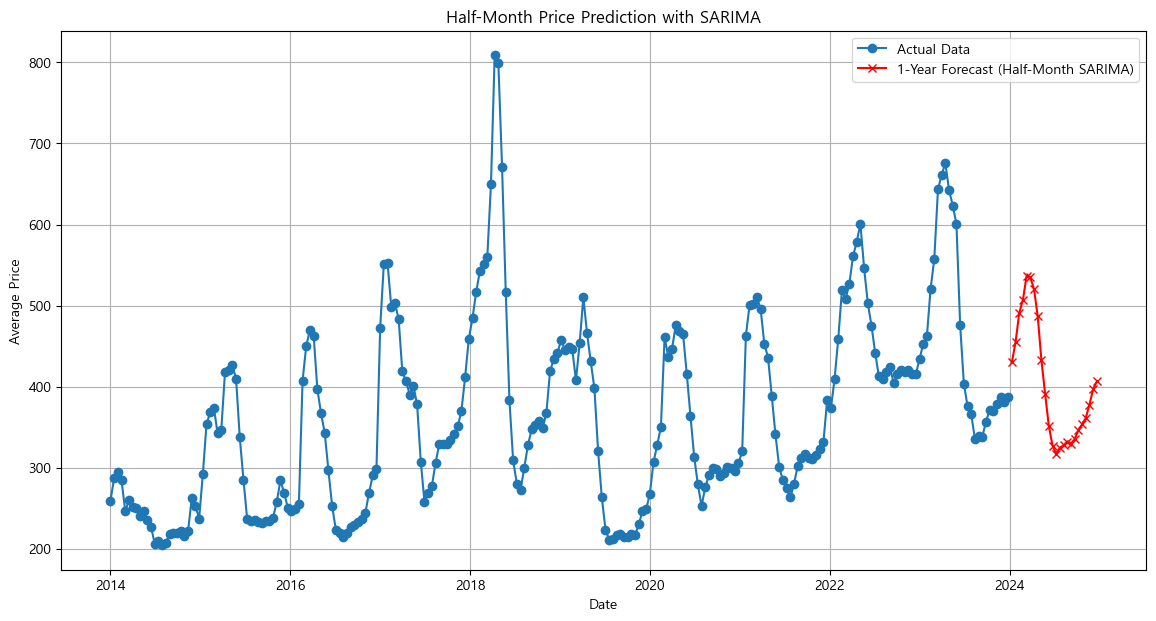

In [154]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# SARIMA 모델 학습 (반월 단위 계절성: 24)
model = SARIMAX(half_month_prices, 
                order=(5, 1, 0), 
                seasonal_order=(1, 1, 1, 24))  # 계절성 주기: 24
fitted_model = model.fit()

# 1년(24개의 반월 단위) 예측
forecast = fitted_model.get_forecast(steps=24)
forecast_values = forecast.predicted_mean

# 예측 인덱스 생성
forecast_index = pd.date_range(start=half_month_prices.index[-1] + pd.DateOffset(days=15), 
                               periods=24, freq='15D')

# 예측 결과를 DataFrame으로 저장
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted Price': forecast_values.values
})

# CSV 파일로 저장
forecast_df.to_csv('감자_반개월_평균값.csv', index=False, encoding='utf-8-sig')
print("반월 단위 예측 결과가 '감자_반개월_평균값.csv' 파일로 저장되었습니다.")

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(half_month_prices, label='Actual Data', marker='o')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast (Half-Month SARIMA)', color='red', marker='x')
plt.title('Half-Month Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
# 일별 데이터를 주별 평균으로 변환
weekly_prices = daily_prices.resample('W').mean()  # 'W'는 주 단위

주 단위 예측 결과가 '감자_주별_평균값.csv' 파일로 저장되었습니다.


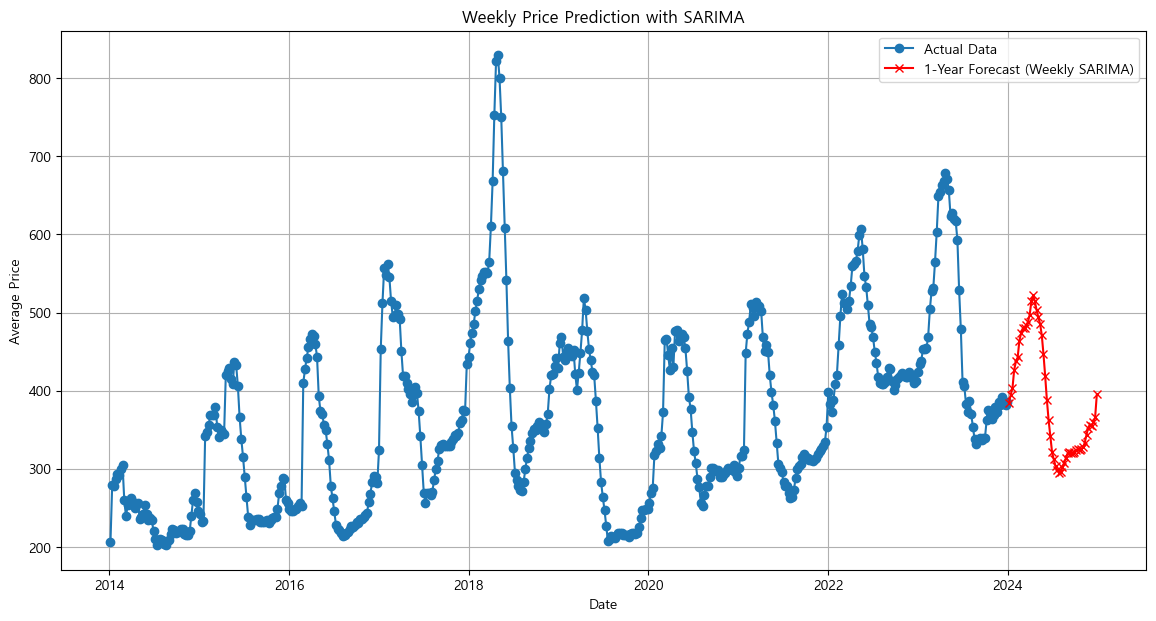

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# SARIMA 모델 학습 (주 단위 계절성: 52)
model = SARIMAX(weekly_prices, 
                order=(5, 1, 0), 
                seasonal_order=(1, 1, 1, 52))  # 계절성 주기: 52주
fitted_model = model.fit()

# 1년(52주) 예측
forecast = fitted_model.get_forecast(steps=52)
forecast_values = forecast.predicted_mean

# 예측 인덱스 생성
forecast_index = pd.date_range(start=weekly_prices.index[-1] + pd.DateOffset(weeks=1), 
                               periods=52, freq='W')

# 예측 결과를 DataFrame으로 저장
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted Price': forecast_values.values
})

# CSV 파일로 저장
forecast_df.to_csv('감자_주별_평균값.csv', index=False, encoding='utf-8-sig')
print("주 단위 예측 결과가 '감자_주별_평균값.csv' 파일로 저장되었습니다.")

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(weekly_prices, label='Actual Data', marker='o')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast (Weekly SARIMA)', color='red', marker='x')
plt.title('Weekly Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA 모델 학습 (계절성 주기: 365일 기준)
model = SARIMAX(daily_prices, 
                order=(5, 1, 0), 
                seasonal_order=(1, 1, 1, 365))
fitted_model = model.fit()

# 1년(365일) 예측
forecast = fitted_model.get_forecast(steps=365)
forecast_index = pd.date_range(start=daily_prices.index[-1], periods=365, freq='D')
forecast_values = forecast.predicted_mean

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(daily_prices, label='Actual Data')
plt.plot(forecast_index, forecast_values, label='1-Year Forecast (SARIMA)', color='red')
plt.title('Daily Price Prediction with SARIMA')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\acorn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
